## SVM ##
Richard Sowers 2018-05-24

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

In [1]:
import numpy
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
numpy.random.seed(0)
N=50
def classifier(point):
    (x,y)=point
    return 1 if 2*x+y>1 else -1

In [3]:
points=numpy.random.normal(size=[N,2])
data=[((x,y),classifier((x,y))) for (x,y) in points]
print(data[:10])

[((1.764052345967664, 0.4001572083672233), 1), ((0.9787379841057392, 2.240893199201458), 1), ((1.8675579901499675, -0.977277879876411), 1), ((0.9500884175255894, -0.1513572082976979), 1), ((-0.10321885179355784, 0.41059850193837233), -1), ((0.144043571160878, 1.454273506962975), 1), ((0.7610377251469934, 0.12167501649282841), 1), ((0.44386323274542566, 0.33367432737426683), 1), ((1.4940790731576061, -0.20515826376580087), 1), ((0.31306770165090136, -0.8540957393017248), -1)]


In [4]:
red_pts=numpy.array([point for (point,flag) in data if flag==1])
green_pts=numpy.array([point for (point,flag) in data if flag==-1])

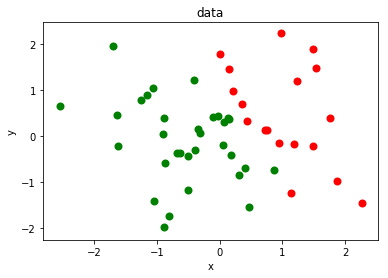

In [5]:
plt.figure()
plt.scatter(red_pts[:,0],red_pts[:,1],color="red",linewidth=2)
plt.scatter(green_pts[:,0],green_pts[:,1],color="green",linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("data")
plt.show()
plt.close()

In [6]:
class SVM:
    def __init__(self,data,penalty=0):
        self.points=numpy.array([point for (point,_) in data])
        self.flags=numpy.array([flag for (_,flag) in data])
        #print("points: "+str(self.points[:10]))
        #print("flags: "+str(self.flags[:10]))
        self.penalty=penalty
        self.ctr=0
           
    def Err(self,x):
        x=numpy.array(x)
        (w,b)=(x[:-1],x[-1])
        temp=numpy.multiply(self.flags,self.points @ w-b)
        temp=numpy.maximum(0,1-temp)
        err=numpy.mean(temp)+self.penalty*numpy.dot(w,w)
        return err
            
    def callback(self,x):
        print("ctr="+str(self.ctr)+"; w="+str(x[:-1])+"; b="+str(x[-1])+"; error="+str(self.Err(x)))
        self.ctr+=1
               


In [7]:
Reg=SVM(data,penalty=1)
print("\npoints:\n"+str(Reg.points[:10]))
print("\nflags:\n"+str(Reg.flags[:10]))

out=scipy.optimize.minimize(Reg.Err,[1,1,1],callback=Reg.callback)
print(out)
#(w,b)=out.x
#print("estimated (w,b)="+str((w,b)))


points:
[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574]]

flags:
[ 1  1  1  1 -1  1  1  1  1 -1]
ctr=0; w=[0.34706647 0.23033568]; b=0.962654999054323; error=0.7338214021639635
ctr=1; w=[0.14626486 0.11316368]; b=0.7816795185354495; error=0.6913810067798951
ctr=2; w=[0.2685944  0.01062399]; b=0.8609179107314628; error=0.6877461991904219
ctr=3; w=[0.25316119 0.03722723]; b=0.8647007856363643; error=0.6813498034931011
ctr=4; w=[0.21037783 0.07756486]; b=0.8432570056098461; error=0.6724628859272599
ctr=5; w=[0.20607661 0.08166984]; b=0.8391213152320066; error=0.6722951009262118
ctr=6; w=[0.20107685 0.09120478]; b=0.8460485252422962; error=0.6722422124416125
ctr=7; w=[0.20124386 0.08852448]; b=0.8481091856024234; error=0.6721994543857756
ctr=8; w=[0.20025987 0.08833362];

##  Let's guess the scale of some things  ##

In [8]:
import numpy.linalg
import itertools

In [9]:
## compute minimum distance
distances=[numpy.linalg.norm(points[n]-points[nn]) for n,nn in itertools.product(range(N),range(N)) if nn>n]

In [10]:
distance_min=numpy.min(distances)
print("distance_min: "+str(distance_min))
print("distance_min^2: "+str(distance_min**2))

distance_min: 0.032772344139217896
distance_min^2: 0.0010740265403793297


In [11]:
## w should be of order distance_min
Reg=SVM(data,penalty=0.0001)

out=scipy.optimize.minimize(Reg.Err,[1,1,1],callback=Reg.callback)
print(out)

ctr=0; w=[1.25141744 0.93884338]; b=0.8999999985098839; error=0.25667068066711685
ctr=1; w=[1.77233892 0.87042721]; b=0.6290459411321414; error=0.19744710312017744
ctr=2; w=[1.92748556 0.94245824]; b=0.6330775774763274; error=0.18493383010083034
ctr=3; w=[3.27886431 1.53738363]; b=1.2666859390607064; error=0.09873756355743807
ctr=4; w=[4.48695029 1.99949542]; b=1.8093279755876024; error=0.06644792933596867
ctr=5; w=[5.10057305 2.23140797]; b=2.109649784670951; error=0.058242758712930325
ctr=6; w=[6.15851437 2.61096867]; b=2.601639837344287; error=0.051549278588179724
ctr=7; w=[7.49734002 3.15405929]; b=3.3380190444632176; error=0.04298666139883287
ctr=8; w=[8.04970197 3.40508475]; b=3.6884336633206956; error=0.04249693680956631
ctr=9; w=[7.96825715 3.3889379 ]; b=3.6723697425322173; error=0.04160341827216666
ctr=10; w=[7.01331228 3.20084263]; b=3.304529315329802; error=0.04138432881816339
ctr=11; w=[7.44357554 3.26805064]; b=3.445741767823271; error=0.038902080987361726
ctr=12; w=[7.44

### let's directly use sklearn.svm ###

In [12]:
import sklearn.svm

In [14]:
points=points
classes=[(y+1)/2 for _,y in data]
print(points[:40])
print(classes[:40])

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [-0.34791215  0.15634897]
 [ 1.23029068  1.20237985]
 [-0.38732682 -0.30230275]
 [-1.04855297 -1.42001794]
 [-1.70627019  1.9507754 ]
 [-0.50965218 -0.4380743 ]
 [-1.25279536  0.77749036]
 [-1.61389785 -0.21274028]
 [-0.89546656  0.3869025 ]
 [-0.51080514 -1.18063218]
 [-0.02818223  0.42833187]
 [ 0.06651722  0.3024719 ]
 [-0.63432209 -0.36274117]
 [-0.67246045 -0.35955316]
 [-0.81314628 -1.7262826 ]
 [ 0.17742614 -0.40178094]
 [-1.63019835  0.46278226]
 [-0.90729836  0.0519454 ]
 [ 0.72909056  0.12898291]
 [ 1.13940068 -1.23482582]
 

In [22]:
clf = sklearn.svm.LinearSVC()
clf.fit(points,classes)  

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [26]:
print(clf.predict([[0, 0]]))
print(clf.predict([[1, 0]]))

[0.]
[1.]


In [27]:
print(clf.coef_)
print(clf.intercept_)

[[2.07833089 0.97460841]]
[-0.96054531]
